# Cleaning US Data

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Combining Multiple Data

In [179]:
df = glob.glob('state*.csv')

In [180]:
df

['state0.csv',
 'state1.csv',
 'state2.csv',
 'state3.csv',
 'state4.csv',
 'state5.csv',
 'state6.csv',
 'state7.csv',
 'state8.csv',
 'state9.csv']

In [181]:
df_list = []
for filename in df:
    data = pd.read_csv(filename)
    df_list.append(data)

In [182]:
us_census = pd.concat(df_list)

In [183]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [184]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [185]:
us_census.describe()

,Unnamed: 0,TotalPop
count,60.000000,6.000000e+01
mean,2.500000,6.238516e+06
std,1.722237,6.588488e+06
min,0.000000,6.266040e+05
25%,1.000000,2.030429e+06
50%,2.500000,4.701414e+06
75%,4.000000,7.303256e+06
max,5.000000,3.842146e+07


In [186]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [187]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

# Data Cleaning

In [190]:
us_census.Income = pd.to_numeric(us_census.Income.replace('[\$]', '', regex=True))

In [191]:
us_census.Income.dtypes

dtype('float64')

Gender Split

In [192]:
gender_split = us_census.GenderPop.str.split('_')

In [193]:
us_census['Men'] = pd.to_numeric(gender_split.str.get(0).str[:-1])
us_census['Women'] = pd.to_numeric(gender_split.str.get(1).str[:-1])

In [194]:
us_census.head(1)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0


In [195]:
us_census[['Men', 'Women']].dtypes

Men        int64
Women    float64
dtype: object

Fill in those nans at Women by using pandas’ .fillna() function

In [196]:
us_census = us_census.fillna(value={
    'Women': us_census.TotalPop - us_census.Men
})

In [197]:
us_census[['State', 'Income', 'Men', 'Women' ]].head()

,State,Income,Men,Women
0,Alabama,43296.358603,2341093,2489527.0
1,Alaska,70354.743902,384160,349215.0
2,Arizona,54207.820955,3299088,3342840.0
3,Arkansas,41935.633968,1451913,1506295.0
4,California,67264.782303,19087135,19334329.0


Scatter Plot

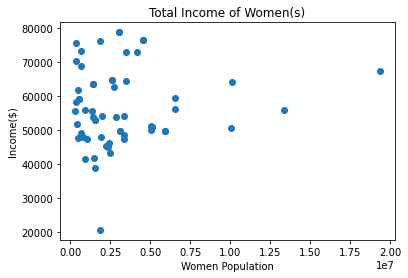

<Figure size 432x288 with 0 Axes>

In [198]:
plt.scatter(us_census.Women, us_census.Income)
plt.title('Total Income of Women(s)')
plt.xlabel('Women Population')
plt.ylabel('Income($)')
plt.show()
plt.clf()

Check and Drop the Duplicates Data

In [199]:
us_census.duplicated().sum()

0

In [201]:
us_census = us_census.drop(columns=['Unnamed: 0'])
us_census.duplicated().sum()

9

In [202]:
us_census = us_census.drop_duplicates().reset_index(drop=True)

In [203]:
us_census.duplicated().sum()

0

Cleaning the rest of DataFrame

In [204]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic.replace('[\%]', '', regex=True))
us_census.White = pd.to_numeric(us_census.White.replace('[\%]', '', regex=True))
us_census.Black = pd.to_numeric(us_census.Black.replace('[\%]', '', regex=True))
us_census.Native = pd.to_numeric(us_census.Native.replace('[\%]', '', regex=True))
us_census.Asian = pd.to_numeric(us_census.Asian.replace('[\%]', '', regex=True))
us_census.Pacific = pd.to_numeric(us_census.Pacific.replace('[\%]', '', regex=True))

In [205]:
us_census.fillna(value={
  'Hispanic': us_census.Hispanic.mean(),
  'White': us_census.White.mean(),
  'Black': us_census.Black.mean(),
  'Native': us_census.Native.mean(),
  'Asian': us_census.Asian.mean(),
  'Pacific': us_census.Pacific.mean()
}, inplace=True)

In [206]:
us_census.duplicated().sum()

0

In [207]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.306500,64657.801787,2648667M_2630239F,2648667,2630239.0
6,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607M_1841615F,1751607,1841615.0
7,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,0.306500,61827.976636,448413M_478041F,448413,478041.0
8,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674M_340810F,306674,340810.0
9,Florida,19645772,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009M_10045763F,9600009,10045763.0


# Histogram of Race

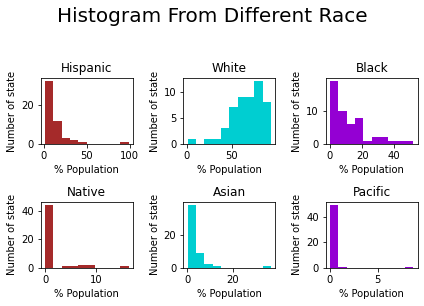

<Figure size 432x288 with 0 Axes>

In [224]:
fig, ax = plt.subplots(2,3)
ax[0][0].hist(us_census.Hispanic, color='#A52A2A')
ax[0][1].hist(us_census.White, color='#00CED1')
ax[0][2].hist(us_census.Black, color='#9400D3')
ax[1][0].hist(us_census.Native, color='#A52A2A')
ax[1][1].hist(us_census.Asian, color='#00CED1')
ax[1][2].hist(us_census.Pacific, color='#9400D3')

ax[0][0].set(title='Hispanic', xlabel='% Population', ylabel='Number of state')
ax[0][1].set(title='White', xlabel='% Population', ylabel='Number of state')
ax[0][2].set(title='Black', xlabel='% Population', ylabel='Number of state')
ax[1][0].set(title='Native', xlabel='% Population', ylabel='Number of state')
ax[1][1].set(title='Asian', xlabel='% Population', ylabel='Number of state')
ax[1][2].set(title='Pacific', xlabel='% Population', ylabel='Number of state')

fig.suptitle('Histogram From Different Race', y=1.05, fontsize=20)
fig.tight_layout(pad)

plt.show()
plt.clf()

# Pie Race Distribution

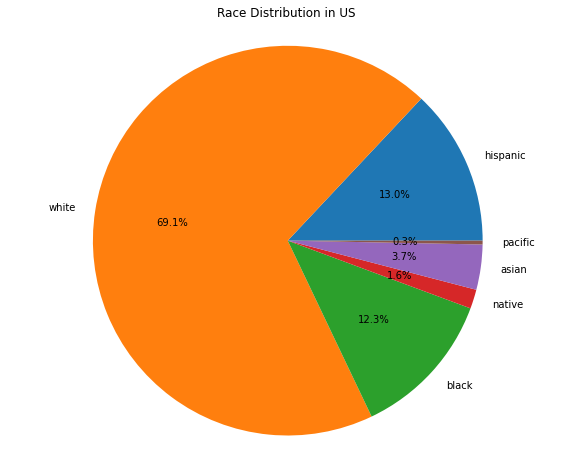

In [233]:
hispanic = us_census.Hispanic.sum()
white = us_census.White.sum()
black = us_census.Black.sum()
native = us_census.Native.sum()
asian = us_census.Asian.sum()
pacific = us_census.Pacific.sum()

race_types = ['hispanic', 'white', 'black', 'native', 'asian', 'pacific']
races = [hispanic, white, black, native, asian, pacific]

plt.figure(figsize=(10,8))
plt.title('Race Distribution in US')
plt.pie(races, labels=race_types, autopct='%1.1f%%')
plt.axis('equal')
plt.show()